In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

L_data = pd.read_csv("Data/L_data_merged.csv", low_memory = False)

L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

In [2]:
#create data frame for 2018 data
L_data_2018 = L_data.loc[(L_data['date']>= '01-01-2018') & (L_data['date']<= "12-29-2018")]
L_data_2018.sort_values(by=['date'], inplace = True)

L_data_2018 = L_data_2018.reset_index(drop = True)
L_data_2018.head()

C:\Users\cdfen\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
0,2018-01-01,U,3258,95th/Dan Ryan (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.722377, -87.624342)",Roseland,Chicago
1,2018-01-01,U,1082,Chicago (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.896075, -87.655214)",West Town,Chicago
2,2018-01-01,U,574,Central (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.887389, -87.76565)",Austin,Chicago
3,2018-01-01,U,1263,Sox-35th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.831191, -87.630636)",Armour Square,Chicago
4,2018-01-01,U,1549,87th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.735372, -87.624717)",South Side,Chicago


In [3]:
L_data_2018['Week Number'] = L_data_2018['date'].dt.week
L_data_2018

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City,Week Number
0,2018-01-01,U,3258,95th/Dan Ryan (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.722377, -87.624342)",Roseland,Chicago,1
1,2018-01-01,U,1082,Chicago (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.896075, -87.655214)",West Town,Chicago,1
2,2018-01-01,U,574,Central (Green Line),True,False,False,True,False,False,False,False,False,False,"(41.887389, -87.76565)",Austin,Chicago,1
3,2018-01-01,U,1263,Sox-35th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.831191, -87.630636)",Armour Square,Chicago,1
4,2018-01-01,U,1549,87th (Red Line),True,True,False,False,False,False,False,False,False,False,"(41.735372, -87.624717)",South Side,Chicago,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52268,2018-12-29,A,1314,Morgan (Green & Pink Lines),True,False,False,True,False,False,False,False,True,False,"(41.885586, -87.652193)",West Loop,Chicago,52
52269,2018-12-29,A,3979,"Fullerton (Red, Brown & Purple Lines)",True,False,False,False,True,False,True,False,False,False,"(41.925051, -87.652866)",Sheffield & DePaul,Chicago,52
52270,2018-12-29,A,1169,Grand (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.891189, -87.647578)",West Town,Chicago,52
52271,2018-12-29,A,1323,Pulaski (Blue Line),False,False,True,False,False,False,False,False,False,False,"(41.873797, -87.725663)",Garfield Park,Chicago,52


In [4]:
weekly_2018 = L_data_2018.groupby('Week Number').sum()
weekly_2018 = weekly_2018.reset_index()
weekly_2018.head()

,Week Number,rides,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O
0,1,2433501,196.0,231.0,204.0,190.0,63.0,134.0,21.0,106.0,57.0
1,2,3230587,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
2,3,3247214,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
3,4,3512664,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0
4,5,3367002,196.0,231.0,203.0,189.0,63.0,133.0,21.0,105.0,56.0


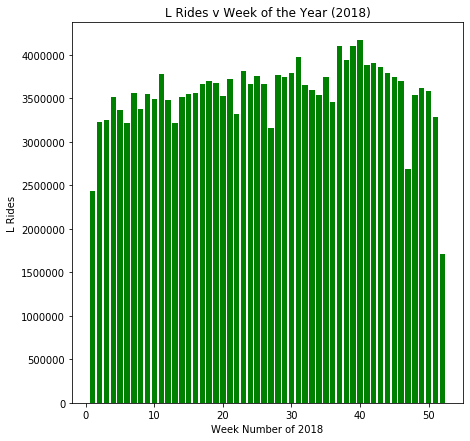

In [6]:
# Create a line Plot 2018 weekly rides
x_values = weekly_2018['Week Number']
y_values = weekly_2018['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='g')
plt.xlabel('Week Number of 2018')
plt.ylabel('L Rides')
plt.title('L Rides v Week of the Year (2018)')
plt.savefig("Seasonal_Analysis/Plots/'L rides by week 2018", bbox_inches='tight')
plt.show()


In [ ]:
#create data frame for 2018 data, january to end of may to compare with partital 2020 year
L_data_2018_JtoM = L_data.loc[(L_data['date']>= '01-01-2018') & (L_data['date']<= "05-31-2018")]
L_data_2018_JtoM.sort_values(by=['date'], inplace = True)

L_data_2018_JtoM = L_data_2018_JtoM.reset_index(drop = True)
L_data_2018_JtoM['Week Number'] = L_data_2018_JtoM['date'].dt.week

weekly_2018_JtoM = L_data_2018_JtoM.groupby('Week Number').sum()
weekly_2018_JtoM = weekly_2018_JtoM.reset_index()
weekly_2018_JtoM.head()

In [ ]:
# Create a second line Plot 2018 weekly rides, january to end of may to compare with partital 2020 year
x_values = weekly_2018_JtoM['Week Number']
y_values = weekly_2018_JtoM['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='g')
plt.xlabel('Week Number of 2018')
plt.ylabel('L Rides')
plt.title('L Rides v Week of the Year (January through May 2018)')
plt.savefig("Plots/'L rides by week (Jan-May) 2018", bbox_inches='tight')
plt.show()

In [ ]:
#create data frame for 2019 data
L_data_2019 = L_data.loc[(L_data['date']>= '01-01-2019') & (L_data['date']<= "12-28-2019")]
L_data_2019.sort_values(by=['date'], inplace = True)

L_data_2019 = L_data_2019.reset_index(drop = True)
L_data_2019['Week Number'] = L_data_2019['date'].dt.week

In [ ]:
weekly_2019 = L_data_2019.groupby('Week Number').sum()
weekly_2019 = weekly_2019.reset_index()
weekly_2019.head()

In [ ]:
# Create a line Plot 2019 weekly rides
x_values = weekly_2019['Week Number']
y_values = weekly_2019['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='b')
plt.xlabel('Week Number of 2019')
plt.ylabel('L Rides')
plt.title('L Rides v Week of the Year (2019)')
plt.savefig("Plots/'L rides by week 2019", bbox_inches='tight')
plt.show()

In [ ]:
#create data frame for 2019 data
L_data_2019_JtoM = L_data.loc[(L_data['date']>= '01-01-2019') & (L_data['date']<= "05-31-2019")]
L_data_2019_JtoM.sort_values(by=['date'], inplace = True)

L_data_2019_JtoM = L_data_2019_JtoM.reset_index(drop = True)
L_data_2019_JtoM['Week Number'] = L_data_2019_JtoM['date'].dt.week

weekly_2019_JtoM = L_data_2019_JtoM.groupby('Week Number').sum()
weekly_2019_JtoM = weekly_2019_JtoM.reset_index()
weekly_2019_JtoM.head()

In [ ]:
# Create a second line Plot 2019 weekly rides, january to end of may to compare with partital 2020 year
x_values = weekly_2019_JtoM['Week Number']
y_values = weekly_2019_JtoM['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='b')
plt.xlabel('Week Number of 2019')
plt.ylabel('L Rides')
plt.title('L Rides v Week of the Year (January through May 2019)')
plt.savefig("Plots/'L rides by week (Jan-May) 2019", bbox_inches='tight')
plt.show()

In [ ]:
#create data frame for 2020 data
L_data_2020 = L_data.loc[(L_data['date']>= '01-01-2020') & (L_data['date']<= "12-26-2020")]
L_data_2020.sort_values(by=['date'], inplace = True)

L_data_2020 = L_data_2020.reset_index(drop = True)
L_data_2020['Week Number'] = L_data_2020['date'].dt.week

In [ ]:
weekly_2020 = L_data_2020.groupby('Week Number').sum()
weekly_2020 = weekly_2020.reset_index()
weekly_2020.head()

In [ ]:
# Create a line Plot 2020 weekly rides
x_values = weekly_2020['Week Number']
y_values = weekly_2020['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='r')
plt.xlabel('Week Number of 2020')
plt.ylabel('L Rides')
plt.title('L Rides v Week of the Year (2020)')
plt.savefig("Plots/'L rides by week 2020", bbox_inches='tight')
plt.show()

In [ ]:
#Plot total weekly number of rides by daytype for past 3 years for january to end of may
plotdata = pd.DataFrame({
    "Total Rides (2018)": weekly_2018_JtoM['rides'],
    "Total Rides (2019)": weekly_2019_JtoM['rides'],
    "Total Rides (2020)": weekly_2020['rides']
    },
    index=weekly_2020['Week Number']
).dropna()

color = ["green", "blue", "red"]

plotdata.plot(kind="bar", color=color, figsize=(10,10))
plt.title("Number of L Rides v Week of the Year (2018-2020)")
plt.xlabel("Week of the Year")
plt.ylabel("L Rides")
plt.savefig("Plots/'L rides by week year comparision", bbox_inches='tight')

In [ ]:

bus_data = pd.read_csv("Data/bus_ridership_daily.csv", low_memory = False)

bus_data['date'] = pd.to_datetime(bus_data['date'], infer_datetime_format=True)

In [ ]:
#create data frame for 2018 bus data
bus_data_2018 = bus_data.loc[(bus_data['date']>= '01-01-2018') & (bus_data['date']<= "12-29-2018")]
bus_data_2018.sort_values(by=['date'], inplace = True)

bus_data_2018 = bus_data_2018.reset_index(drop = True)
bus_data_2018.head()

In [ ]:
bus_data_2018['Week Number'] = bus_data_2018['date'].dt.week

bus_weekly_2018 = bus_data_2018.groupby('Week Number').sum()
bus_weekly_2018 = bus_weekly_2018.reset_index()
bus_weekly_2018.head()

In [ ]:
# Create a line Plot 2018 bus weekly rides
x_values = bus_weekly_2018['Week Number']
y_values = bus_weekly_2018['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='g')
plt.xlabel('Week Number of 2018')
plt.ylabel('Bus Rides')
plt.title('Bus Rides v Week of the Year (2018)')
plt.savefig("Plots/'Bus rides by week 2018", bbox_inches='tight')
plt.show()

In [ ]:
#create data frame for 2018 bus data, january to end of may to compare with partital 2020 year
bus_data_2018_JtoM = bus_data.loc[(bus_data['date']>= '01-01-2018') & (bus_data['date']<= "05-31-2018")]
bus_data_2018_JtoM.sort_values(by=['date'], inplace = True)

bus_data_2018_JtoM = bus_data_2018_JtoM.reset_index(drop = True)
bus_data_2018_JtoM['Week Number'] = bus_data_2018_JtoM['date'].dt.week

bus_weekly_2018_JtoM = bus_data_2018_JtoM.groupby('Week Number').sum()
bus_weekly_2018_JtoM = bus_weekly_2018_JtoM.reset_index()
bus_weekly_2018_JtoM.head()

In [ ]:
# Create a second line Plot 2018 weekly bus rides, january to end of may to compare with partital 2020 year
x_values = bus_weekly_2018_JtoM['Week Number']
y_values = bus_weekly_2018_JtoM['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='g')
plt.xlabel('Week Number of 2018')
plt.ylabel('Bus Rides')
plt.title('Bus Rides v Week of the Year (January through May 2018)')
plt.savefig("Plots/'Bus rides by week (Jan-May) 2018", bbox_inches='tight')
plt.show()

In [ ]:
#create data frame for 2019 bus data
bus_data_2019 = bus_data.loc[(bus_data['date']>= '01-01-2019') & (bus_data['date']<= "12-28-2019")]
bus_data_2019.sort_values(by=['date'], inplace = True)

bus_data_2019 = bus_data_2019.reset_index(drop = True)
bus_data_2019['Week Number'] = bus_data_2019['date'].dt.week

bus_weekly_2019 = bus_data_2019.groupby('Week Number').sum()
bus_weekly_2019 = bus_weekly_2019.reset_index()
bus_weekly_2019.head()

In [ ]:
# Create a line Plot 2019 weekly bus rides
x_values = bus_weekly_2019['Week Number']
y_values = bus_weekly_2019['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='b')
plt.xlabel('Week Number of 2019')
plt.ylabel('Bus Rides')
plt.title('Bus Rides v Week of the Year (2019)')
plt.savefig("Plots/'Bus rides by week 2019", bbox_inches='tight')
plt.show()

In [ ]:
#create data frame for 2019 bus data january through may
bus_data_2019_JtoM = bus_data.loc[(bus_data['date']>= '01-01-2019') & (bus_data['date']<= "05-31-2019")]
bus_data_2019_JtoM.sort_values(by=['date'], inplace = True)

bus_data_2019_JtoM = bus_data_2019_JtoM.reset_index(drop = True)
bus_data_2019_JtoM['Week Number'] = bus_data_2019_JtoM['date'].dt.week

bus_weekly_2019_JtoM = bus_data_2019_JtoM.groupby('Week Number').sum()
bus_weekly_2019_JtoM = bus_weekly_2019_JtoM.reset_index()
bus_weekly_2019_JtoM.head()

In [ ]:
# Create a second line Plot 2019 weekly rides, january to end of may to compare with partital 2020 year
x_values = bus_weekly_2019_JtoM['Week Number']
y_values = bus_weekly_2019_JtoM['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='b')
plt.xlabel('Week Number of 2019')
plt.ylabel('Bus Rides')
plt.title('Bus Rides v Week of the Year (January through May 2019)')
plt.savefig("Plots/'Bus rides by week (Jan-May) 2019", bbox_inches='tight')
plt.show()

In [ ]:
#create data frame for 2020 bus data
bus_data_2020 = bus_data.loc[(bus_data['date']>= '01-01-2020') & (bus_data['date']<= "12-26-2020")]
bus_data_2020.sort_values(by=['date'], inplace = True)

bus_data_2020 = bus_data_2020.reset_index(drop = True)
bus_data_2020['Week Number'] = bus_data_2020['date'].dt.week

bus_weekly_2020 = bus_data_2020.groupby('Week Number').sum()
bus_weekly_2020 = bus_weekly_2020.reset_index()
bus_weekly_2020.head()

In [ ]:
# Create a line Plot 2020 weekly rides
x_values = bus_weekly_2020['Week Number']
y_values = bus_weekly_2020['rides']
f,ax = plt.subplots(figsize=(7,7))
plt.bar(x_values,y_values, color='r')
plt.xlabel('Week Number of 2020')
plt.ylabel('Bus Rides')
plt.title('Bus Rides v Week of the Year (2020)')
plt.savefig("Plots/'Bus rides by week 2020", bbox_inches='tight')
plt.show()

In [ ]:
#Plot total weekly number of bus rides by daytype for past 3 years for january to end of may
plotdata = pd.DataFrame({
    "Total Rides (2018)": bus_weekly_2018_JtoM['rides'],
    "Total Rides (2019)": bus_weekly_2019_JtoM['rides'],
    "Total Rides (2020)": bus_weekly_2020['rides']
    },
    index=bus_weekly_2020['Week Number']
).dropna()

color = ["green", "blue", "red"]

plotdata.plot(kind="bar", color=color, figsize=(10,10))
plt.title("Number of Bus Rides v Week of the Year (2018-2020)")
plt.xlabel("Week of the Year")
plt.ylabel("Bus Rides")
plt.savefig("Plots/'Bus rides by week year comparision", bbox_inches='tight')

Analysis:

There are a few observerable trends in the data when analyzed by week of the year. Both the bus lines and L lines have steady travel all year round, but for both forms of transportation the number or rides taken is highest the few weeks before week 40 and a few weeks after. Possible reasons for this spike include outside concerts such as Lollapalooza. Chicago has many festivals, concerts and other events held during the summer that could coincide with this increase in travel. Furthermore, this time frame coincides with the end of summer vacation for many students. Return to school for both teachers and students could help to explain the increase in ridership. 

Both the Bus and L lines also see a decrease in ridership in the end of December and beginning of January. This trend in drop off in ridership could be explained by the winter holidays and cold weather in which more people spend time at home and are not traveling as much for school or work. Week 4 specifically of 2019 has a large drop in ridership compared to both 2020 and 2018. In looking at temperature records for that week in 2019, that particular week recorded record low temperatures which could explain the lack of ridership. Finally, in looking at the week by week analysis, 2020 is comparable to previous years, however, by week 11 there is a significant drop off in travel on both the L and bus lines. This coincides with the outbreak of Covid-19 and the implementation of safety measures to reduce its spread which would explain the lack of rides taken compared to previous years